In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import joblib

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


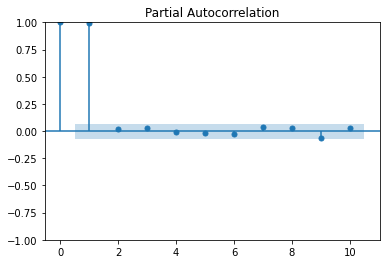

In [2]:
df = pd.read_csv("../input/stockpricepredictons/ICICIBANK.NS.csv", usecols=["Date", "Open", "Adj Close", "High", "Low"], index_col='Date',parse_dates=True)
df = df.iloc[-800::]
sm.graphics.tsa.plot_pacf(df["Open"], lags=10)
plt.show()

In [3]:
train = df

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(train)
scaled_train = scaler.transform(train)
joblib.dump(scaler, 'ICICIBANK_scaler.pkl') 

['ICICIBANK_scaler.pkl']

In [5]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [6]:
# define generator
n_input = 1
n_features = 4
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [7]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.13825307 0.11043754 0.15578342 0.12482229]
Predict this y: 
 [[0.13605565 0.1140397  0.16189962 0.13388245]]


In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [9]:
# define model
model = Sequential()
model.add(LSTM(80, activation='relu', input_shape=(n_input, n_features),return_sequences=True))
model.add(Dense(4))
model.compile(optimizer='adam', loss='mse')

2022-03-23 20:39:35.180976: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-23 20:39:35.265138: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-23 20:39:35.265835: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-23 20:39:35.267064: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [10]:
# fit model
model.fit(generator,epochs=10)

2022-03-23 20:39:37.535333: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
799/799 [==============================] - 6s 5ms/step - loss: 0.0198
Epoch 2/10
799/799 [==============================] - 4s 5ms/step - loss: 4.2946e-04
Epoch 3/10
799/799 [==============================] - 4s 5ms/step - loss: 4.0450e-04
Epoch 4/10
799/799 [==============================] - 4s 5ms/step - loss: 3.7747e-04
Epoch 5/10
799/799 [==============================] - 4s 5ms/step - loss: 3.9896e-04
Epoch 6/10
799/799 [==============================] - 4s 5ms/step - loss: 4.2291e-04
Epoch 7/10
799/799 [==============================] - 5s 6ms/step - loss: 4.1330e-04
Epoch 8/10
799/799 [==============================] - 4s 5ms/step - loss: 3.9737e-04
Epoch 9/10
799/799 [==============================] - 4s 5ms/step - loss: 4.1045e-04
Epoch 10/10
799/799 [==============================] - 4s 5ms/step - loss: 4.0291e-04


In [11]:
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
current_pred = model.predict(current_batch)[0]
print(current_pred)
fin_pred = scaler.inverse_transform(current_pred)
print(fin_pred)
print(scaler.get_params(deep=True))

[[0.7870322  0.76392996 0.78643143 0.79282945]]
[[713.7983  732.6526  705.47723 725.98926]]
{'clip': False, 'copy': True, 'feature_range': (0, 1)}


In [12]:
model.save("ICICIBANK_model.h5")